In [123]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime



In [242]:
import matplotlib.pylab as pylab

params = {#'legend.fontsize': 'x-large',
         #'axes.labelsize': 20,
         #'axes.titlesize':'x-large',
         'xtick.labelsize':20,
         'ytick.labelsize':20}
pylab.rcParams.update(params)

In [10]:
trigger_other = pd.read_excel('../data/all_paper_data.xlsx',sheet_name='Trigger Other')

In [11]:
trigger_other.head()

,Trig_date,District,Chiefdom,Section,Name_of_community,t_q1,t_q2,t_q3,t_q4,t_q5,t_q6,t_q7,t_q8,t_q9,t_q10,t_q11
0,2014-10-12,Kailahun,Luawa,Baoma,Sokebo,Last week,1.0,1.0,Youth Leader,Very High,With the interrvention of Restless Development...,do we need to avoid all bush meat or just monkeys,"Keeping sick persons in the community, Using t...","No sick person should be kept at home, No one ...",High rate of teenage pregnancy,They are capable of carrying out action plan a...
1,2014-11-12,Bo,Bagbo,Ngolapon,Ndeima,3weeks,1.0,1.0,Member,High,"Late arrival of burial team, ineffectiveness o...",Why ebola is not curable,Poor awareness by the community,Strangers not allowed,To engage teenage mothers on livelihood activi...,NaN
2,2014-11-12,Bo,Jaiama Bongor,Upper Kama,Walihun,NaN,1.0,1.0,Member,High,Delay of the burial team,How do we know that someone has ebola,Accomodation of strangers,Guests not allowed,We need PPEs to bury our dead,There concern is that we they want the organis...
3,2014-11-12,Bo,Niawa Lenga,Lower,Mbelebu,NaN,1.0,1.0,ordinary citizen,High,they are not happy with the intervention of th...,when is Ebola going to come to an end?,"touching an infected person,washing dead body.","strangers are not allowed in the community,sic...",8 members of the community have been appointed...,"if they are given the necessary ,they can easi..."
4,2014-11-12,Bo,Valunia,Lunia,Kpetema,4 weeks or more,1.0,1.0,youth leader,High,their concerns where the Gosl will be able to ...,Ifafter ebola they will be washing dead people.,The asses that the key risk of contacting ebol...,Not allowing stranger to enter and stay with t...,The government should support them because the...,Their expectation is very high.


In [12]:
follow_up_other = pd.read_excel('../data/all_paper_data.xlsx',sheet_name='Follow Up Other')

In [13]:
follow_up_other.head()

,Date_of_Visit,District,Chiefdom,Section,Name_of_community,f_q1,f_q2,f_q3,f_q4,f_q5,f_q6
0,2015-01-10 00:00:00,Bo,Komboya,NaN,Mano,NaN,NaN,NaN,they happy now that the medical team are reall...,"no strnger is allow ,and hand washing is frequent","strangers are not allow,no body contact,no vis..."
1,2015-01-06 00:00:00,Bo,Badjia,NaN,Normiyama,1.0,Yes because the community members were allowed...,NaN,"They want government to reopen schools, when w...",Frequent and regular hand washing,Report all sick people to the health center
2,2015-01-07 00:00:00,Bo,Badjia,NaN,Saaso,0.0,NaN,Though there has been no death conducted by th...,Government should train community people to ca...,Frequent and regular hand washing,Refering all sick people to the health centre
3,2015-01-08 00:00:00,Bo,Badjia,NaN,Ngiehun,NaN,NaN,NaN,"The reopening of schools, the reactivation of ...",Frequent and regular hand washing,No public or social gathering
4,2015-01-09 00:00:00,Bo,Badjia,NaN,Grima,NaN,NaN,NaN,The community members want veronical buckets a...,No Ebola cases in our community and all sick p...,No body contact or hand shaking


In [15]:
digital = pd.read_csv('../data/digital.csv', low_memory=False)

In [18]:
digital.today

0         3/24/2015
1         3/16/2015
2         3/24/2015
3         3/23/2015
4         3/24/2015
            ...    
36601     8/16/2015
36602     8/23/2015
36603     8/30/2015
36604    10/25/2015
36605     11/8/2016
Name: today, Length: 36606, dtype: object

## Datetime Plots

In [75]:
trigger_dt = pd.to_datetime(trigger_other.Trig_date, infer_datetime_format=True, exact=False)
trigger_dt_range = pd.date_range(trigger_dt.min(), trigger_dt.max(),freq='D').values
trigger_counts = trigger_dt.value_counts().sort_index()
all_counts = trigger_counts.reindex(trigger_dt_range, fill_value=0)

In [93]:
def resilient_dt(dt_obj):
    try:
        return pd.to_datetime(dt_obj, infer_datetime_format=True, exact=False)
    except:
        return np.nan

In [148]:
def coerce_date(dt_obj, year):
    try:
        return dt_obj.replace(year=year)
    except ValueError:
        return np.nan

In [155]:
def fill_datetime(dt_obs, coerce_year = None):
    """Return datetime observations with consistent observation window
    """
    temp_dt = dt_obs.apply(lambda x: resilient_dt(x))#pd.to_datetime(dt_obs, infer_datetime_format=True)
    if coerce_year:
        temp_dt = temp_dt.apply(lambda x: coerce_date(x,coerce_year)) 
    temp_dt_range = pd.date_range(temp_dt.min(), temp_dt.max(),freq='D').values
    
    temp_counts = temp_dt.value_counts().sort_index()
    return temp_counts.reindex(temp_dt_range, fill_value=0)

In [106]:
f_res = follow_up_other.Date_of_Visit.apply(lambda x: resilient_dt(x))

In [108]:
f_res.value_counts()

2015-02-12    476
2015-02-11    331
2015-02-05    328
2015-03-14    316
2015-02-10    304
             ... 
2015-09-22      1
2015-10-03      1
2016-06-22      1
2015-09-20      1
2015-04-29      1
Name: Date_of_Visit, Length: 299, dtype: int64

In [100]:
trigger_counts  = fill_datetime(trigger_other.Trig_date)

In [109]:
followup_counts  = fill_datetime(follow_up_other.Date_of_Visit)

In [156]:
digital_counts = fill_datetime(digital.today, 2015)

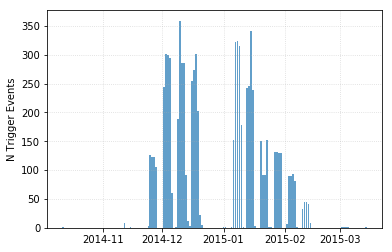

In [65]:
plt.bar(all_counts.index, all_counts.values,alpha=.7)
plt.ylabel('N Trigger Events')
plt.grid(linestyle=':',alpha=.5)

In [222]:
fc_b = followup_counts[followup_counts.index>datetime(2015,3,1)]

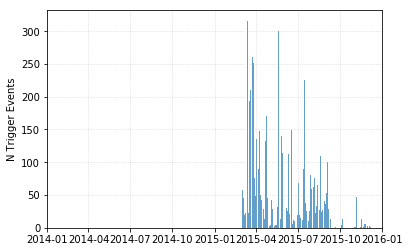

In [223]:
plt.bar(fc_b.index, fc_b.values,alpha=.7)
plt.ylabel('N Trigger Events')
plt.xlim(datetime(2014,1,1),datetime(2016,1,1))
plt.grid(linestyle=':',alpha=.5)

In [166]:
dc_b = digital_counts[(digital_counts.index>datetime(2015,3,1))]

In [168]:
dc_b.sum()

35095

In [212]:
pd.concat([dc_b,fc_b],axis=1)

,today,Date_of_Visit
2014-03-02,NaN,0
2014-03-03,NaN,0
2014-03-04,NaN,0
2014-03-05,NaN,0
2014-03-06,NaN,0
...,...,...
2025-05-24,NaN,0
2025-05-25,NaN,0
2025-05-26,NaN,0
2025-05-27,NaN,0


(array([735658., 735689., 735719., 735750., 735780., 735811., 735842.,
        735872., 735903., 735933., 735964.]),
 <a list of 11 Text xticklabel objects>)

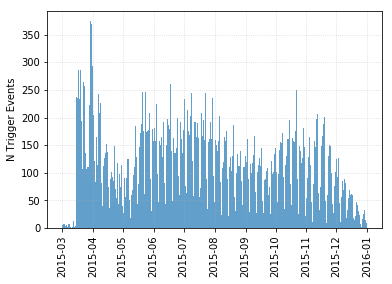

In [213]:
plt.bar(dc_b.index, dc_b.values, alpha=.7)
plt.ylabel('N Trigger Events')
plt.grid(linestyle=':',alpha=.5)
plt.xticks(rotation=90)

In [224]:
all_follow = pd.concat([dc_b,fc_b],axis=1)

In [225]:
all_follow.fillna(0,inplace=True)

In [226]:
all_follow = all_follow.today + all_follow.Date_of_Visit

AttributeError: 'AxesSubplot' object has no attribute 'par'

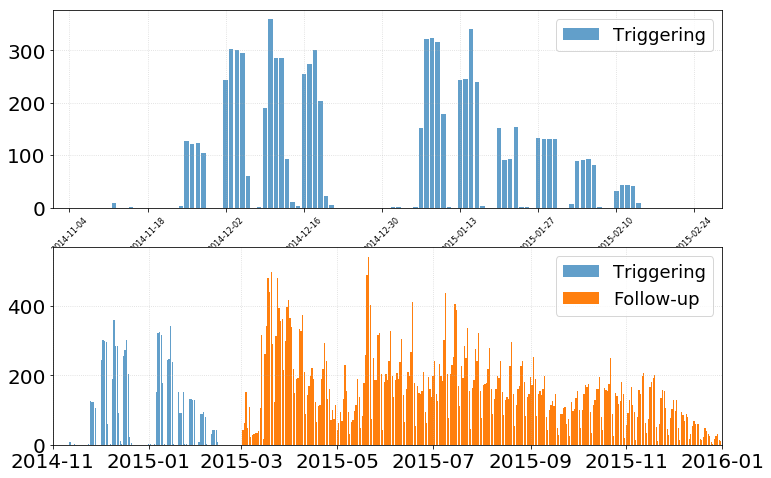

In [245]:
f,a = plt.subplots(2,1,figsize=(12,8))

a=a.ravel()

a[0].bar(all_counts.index, all_counts.values,alpha=.7,label='Triggering')
a[0].legend(fontsize=18)
#a[0].set_ylabel('N Trigger Events')
a[0].grid(linestyle=':',alpha=.5)
a[0].set_xlim(datetime(2014,11,1),datetime(2015,3,1))
a[0].tick_params(axis='x',labelrotation=45,labelsize=8)


a[1].bar(all_counts.index, all_counts.values,alpha=.7,label='Triggering')
#a[1].set_ylabel('N Trigger Events')
a[1].grid(linestyle=':',alpha=.5)
#a[1].annotate('Triggering + follow-up',(.6,.8), xycoords='axes fraction', fontsize=18)

a[1].bar(all_follow.index, all_follow.values,label='Follow-up')
a[1].set_xlim(datetime(2014,11,1),datetime(2016,1,1))
a[1].legend(fontsize=18)
a[1].par (xlabels, rotation=40)

f.text(.025,.5,'N Community Visits', va='center', rotation=90, fontsize=18)

f.tight_layout()
plt.subplots_adjust(left=.1)
plt.savefig('Triggering_followup_counts.pdf')